In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL('modele/rbf_classification/target/release/rbf_classification.so')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

# Données XOR
x_train = np.array([[0.0, 0.0],
                    [0.0, 1.0],
                    [1.0, 0.0],
                    [1.0, 1.0]], dtype=np.float64)
y_train = np.array([0.0, 1.0, 1.0, 0.0], dtype=np.float64)

x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
    *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
)
y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

def train_and_test_rbf_classification(k, gamma, max_iter):
    # Test d'entraînement du modèle RBF
    model_ptr = ctypes.POINTER(RBFModel)()
    weights_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.train_rbf_model_ffi(
        x_train_ptrs,
        y_train_ptr,
        len(x_train),
        x_train.shape[1],
        k,  # nombre de centres
        max_iter, # nombre d'itérations max
        gamma, # gamma
        ctypes.byref(model_ptr),
        ctypes.byref(weights_ptr)
    )
    assert model_ptr is not None
    assert weights_ptr is not None

    # Données de test (identiques aux données d'entraînement)
    x_test = x_train
    x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
    )

    # Test de la prédiction avec le modèle RBF
    pred_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.rbf_classification_ffi(
        x_test_ptrs,
        len(x_test),
        x_test.shape[1],
        model_ptr,
        gamma,  # gamma
        weights_ptr,
        ctypes.byref(pred_ptr)
    )
    assert pred_ptr is not None

    # Lecture et vérification des prédictions
    predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))
    print(f"Predictions with k={k}, gamma={gamma}, max_iter={max_iter}: {predictions}")

    # Libération de la mémoire associée aux prédictions
    lib.free_predictions(pred_ptr)

    # Libération de la mémoire associée au modèle et aux poids
    lib.free_rbf_model(model_ptr)
    ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    # Visualiser les résultats
    plt.figure(figsize=(10, 5))

    # Afficher les points d'entraînement avec leurs étiquettes réelles
    plt.subplot(1, 2, 1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Training data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Données d\'entraînement')
    plt.legend()

    # Afficher les points de test avec leurs étiquettes prédites
    plt.subplot(1, 2, 2)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=predictions, cmap='viridis', marker='x', label='RBF predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Prédictions du modèle RBF')
    plt.legend()

    plt.show()

# Fixer les paramètres k et gamma
k = 6
gamma = 0.1

# Entraîner et tester le modèle avec les paramètres spécifiés
train_and_test_rbf_classification(k, gamma, 100000)


OSError: modele/rbf_classification/target/release/rbf_classification.so: cannot open shared object file: No such file or directory

In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Charger la bibliothèque partagée compilée à partir du code Rust


class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

def generate_classification_data(n_samples, n_features, n_classes, random_state=42):
    """Génère des données de classification."""
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1, n_classes=n_classes, random_state=random_state)
    return X.astype(np.float64), y.astype(np.float64)

def rbf_train_and_predict(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions."""
    x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
    )
    y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

    model_ptr = ctypes.POINTER(RBFModel)()
    weights_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.train_rbf_model_ffi(
        x_train_ptrs,
        y_train_ptr,
        len(x_train),
        x_train.shape[1],
        k,  # nombre de centres
        max_iter, # nombre d'itérations max
        gamma, # gamma
        ctypes.byref(model_ptr),
        ctypes.byref(weights_ptr)
    )
    assert model_ptr is not None
    assert weights_ptr is not None

    x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
    )

    pred_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.rbf_classification_ffi(
        x_test_ptrs,
        len(x_test),
        x_test.shape[1],
        model_ptr,
        gamma,  # gamma
        weights_ptr,
        ctypes.byref(pred_ptr)
    )
    assert pred_ptr is not None

    predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))

    lib.free_predictions(pred_ptr)
    lib.free_rbf_model(model_ptr)
    ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    return predictions

# Générer des données de classification
n_samples = 200
n_features = 2
n_classes = 2
X_train, y_train = generate_classification_data(n_samples, n_features, n_classes)
X_test, y_test = generate_classification_data(100, n_features, n_classes)

# Paramètres du modèle RBF
k = 10  # nombre de centres
gamma = 0.1  # paramètre gamma
max_iter = 100  # nombre d'itérations max

# Entraîner le modèle RBF et effectuer des prédictions
predictions = rbf_train_and_predict(X_train, y_train, X_test, k, gamma, max_iter)

# Convertir les prédictions en classes binaires
predictions_binary = np.where(predictions >= 0.5, 1.0, 0.0)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.84


In [ ]:
import ctypes
import numpy as np

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

# Données d'entraînement
X_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0]
], dtype=np.float64)

y_train = np.array([1.0, -1.0, 1.0], dtype=np.float64)

print(f'Vecteur X_train:\n{X_train}')
print(f'Taille de X_train: {X_train.shape}')

# Convertir les données pour FFI
x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(X_train))(
    *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in X_train]
)
y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

# Paramètres du modèle RBF
k = 2  # nombre de centres
gamma = 1.0  # paramètre gamma
max_iter = 1000  # nombre d'itérations max

# Initialiser et entraîner le modèle RBF
model_ptr = ctypes.POINTER(RBFModel)()
weights_ptr = ctypes.POINTER(ctypes.c_double)()
lib.train_rbf_model_ffi(
    x_train_ptrs,
    y_train_ptr,
    len(X_train),
    X_train.shape[1],
    k,  # nombre de centres
    max_iter, # nombre d'itérations max
    gamma, # gamma
    ctypes.byref(model_ptr),
    ctypes.byref(weights_ptr)
)
assert model_ptr is not None
assert weights_ptr is not None

# Données de test (identiques aux données d'entraînement)
X_test = X_train
x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(X_test))(
    *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in X_test]
)

# Prédiction avec le modèle RBF
pred_ptr = ctypes.POINTER(ctypes.c_double)()
lib.rbf_classification_ffi(
    x_test_ptrs,
    len(X_test),
    X_test.shape[1],
    model_ptr,
    gamma,  # gamma
    weights_ptr,
    ctypes.byref(pred_ptr)
)
assert pred_ptr is not None

# Lecture et affichage des prédictions
raw_predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(X_test),))
print(f'Prédictions brutes : {raw_predictions}')

# Ajustement du seuil de classification
threshold = 0.5
predictions = np.where(raw_predictions >= threshold, 1.0, -1.0)
print(f'Prédictions ajustées : {predictions}')

# Libérer la mémoire associée aux prédictions et au modèle
lib.free_predictions(pred_ptr)
lib.free_rbf_model(model_ptr)
ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))


Vecteur X_train:
[[0. 0.]
 [0. 1.]
 [1. 0.]]
Taille de X_train: (3, 2)
Prédictions brutes : [1. 0. 1.]
Prédictions ajustées : [ 1. -1.  1.]


In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

def generate_multiclass_data():
    """Génère des données de classification multi-classes."""
    X_train = np.array([
        [0.0, 0.0],
        [0.0, 1.0],
        [1.0, 0.0],
        [1.0, 1.0],
        [0.5, 0.5]
    ], dtype=np.float64)

    y_train = np.array([
        0.0,
        1.0,
        2.0,
        0.0,
        1.0
    ], dtype=np.float64)

    return X_train, y_train

def rbf_train_and_predict_multiclass(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions pour un problème multi-classes."""
    predictions = []
    y_train_one_hot = np.eye(int(np.max(y_train)) + 1)[y_train.astype(int)]

    for class_idx in range(y_train_one_hot.shape[1]):
        y_train_class = y_train_one_hot[:, class_idx]

        x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
            *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
        )
        y_train_ptr = y_train_class.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

        model_ptr = ctypes.POINTER(RBFModel)()
        weights_ptr = ctypes.POINTER(ctypes.c_double)()
        lib.train_rbf_model_ffi(
            x_train_ptrs,
            y_train_ptr,
            len(x_train),
            x_train.shape[1],
            k,  # nombre de centres
            max_iter, # nombre d'itérations max
            gamma, # gamma
            ctypes.byref(model_ptr),
            ctypes.byref(weights_ptr)
        )
        assert model_ptr is not None
        assert weights_ptr is not None

        x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
            *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
        )

        pred_ptr = ctypes.POINTER(ctypes.c_double)()
        lib.rbf_classification_ffi(
            x_test_ptrs,
            len(x_test),
            x_test.shape[1],
            model_ptr,
            gamma,  # gamma
            weights_ptr,
            ctypes.byref(pred_ptr)
        )
        assert pred_ptr is not None

        class_predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))
        predictions.append(class_predictions)

        lib.free_predictions(pred_ptr)
        lib.free_rbf_model(model_ptr)
        ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    predictions = np.array(predictions).T
    predicted_classes = np.argmax(predictions, axis=1)
    return predictions, predicted_classes

# Générer des données de classification multi-classes
X_train, y_train = generate_multiclass_data()

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = X_train  # Pour cette démo, on utilise les mêmes données pour le test

# Paramètres du modèle RBF
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # différents nombres de centres
gamma_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]  # différents paramètres gamma
max_iter = 2000  # nombre d'itérations max

# Essayer différentes combinaisons de k et gamma
best_accuracy = 0
best_params = None
for k in k_values:
    for gamma in gamma_values:
        predictions, predicted_classes = rbf_train_and_predict_multiclass(X_train, y_train, X_test, k, gamma, max_iter)
        accuracy = np.mean(predicted_classes == y_train)
        print(f'k = {k}, gamma = {gamma}, accuracy = {accuracy}')
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = (k, gamma)

print(f'Meilleurs paramètres: k = {best_params[0]}, gamma = {best_params[1]}, accuracy = {best_accuracy}')

# Utiliser les meilleurs paramètres pour entraîner et prédire
k, gamma = best_params
predictions, predicted_classes = rbf_train_and_predict_multiclass(X_train, y_train, X_test, k, gamma, max_iter)

# Calculer l'accuracy
accuracy_train = np.mean(predicted_classes == y_train)

# Affichage des résultats
print(f'Prédictions brutes:\n{predictions}')
print(f'Classes prédites:\n{predicted_classes}')
print(f'Classes réelles:\n{y_train}')
print(f'Accuracy: {accuracy_train:.2f}')



k = 5, gamma = 0.01, accuracy = 0.6
k = 5, gamma = 0.1, accuracy = 0.2
k = 5, gamma = 0.5, accuracy = 0.4
k = 5, gamma = 1.0, accuracy = 0.4
k = 5, gamma = 2.0, accuracy = 0.6
k = 5, gamma = 5.0, accuracy = 0.6
k = 5, gamma = 10.0, accuracy = 0.4
k = 5, gamma = 20.0, accuracy = 0.4
k = 10, gamma = 0.01, accuracy = 0.2
k = 10, gamma = 0.1, accuracy = 0.6
k = 10, gamma = 0.5, accuracy = 0.2
k = 10, gamma = 1.0, accuracy = 0.4
k = 10, gamma = 2.0, accuracy = 0.6
k = 10, gamma = 5.0, accuracy = 0.6
k = 10, gamma = 10.0, accuracy = 0.4
k = 10, gamma = 20.0, accuracy = 0.6
k = 15, gamma = 0.01, accuracy = 0.4
k = 15, gamma = 0.1, accuracy = 0.4
k = 15, gamma = 0.5, accuracy = 0.4
k = 15, gamma = 1.0, accuracy = 0.6
k = 15, gamma = 2.0, accuracy = 0.2
k = 15, gamma = 5.0, accuracy = 0.4
k = 15, gamma = 10.0, accuracy = 0.4
k = 15, gamma = 20.0, accuracy = 0.2
k = 20, gamma = 0.01, accuracy = 0.4
k = 20, gamma = 0.1, accuracy = 0.4
k = 20, gamma = 0.5, accuracy = 0.4
k = 20, gamma = 1.0, accur

In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

def generate_classification_data(n_samples, n_features, n_classes, random_state=42):
    """Génère des données de classification."""
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1, n_classes=n_classes, random_state=random_state)
    return X.astype(np.float64), y.astype(np.float64)

def rbf_train_and_predict(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions."""
    x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
    )
    y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

    model_ptr = ctypes.POINTER(RBFModel)()
    weights_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.train_rbf_model_ffi(
        x_train_ptrs,
        y_train_ptr,
        len(x_train),
        x_train.shape[1],
        k,  # nombre de centres
        max_iter, # nombre d'itérations max
        gamma, # gamma
        ctypes.byref(model_ptr),
        ctypes.byref(weights_ptr)
    )
    assert model_ptr is not None
    assert weights_ptr is not None

    x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
    )

    pred_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.rbf_classification_ffi(
        x_test_ptrs,
        len(x_test),
        x_test.shape[1],
        model_ptr,
        gamma,  # gamma
        weights_ptr,
        ctypes.byref(pred_ptr)
    )
    assert pred_ptr is not None

    predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))

    lib.free_predictions(pred_ptr)
    lib.free_rbf_model(model_ptr)
    ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    return predictions

# Générer des données de classification
n_samples = 200
n_features = 2
n_classes = 2
X_train, y_train = generate_classification_data(n_samples, n_features, n_classes)
X_test, y_test = generate_classification_data(100, n_features, n_classes)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paramètres du modèle RBF
k = 10  # nombre de centres
gamma = 0.1  # paramètre gamma
max_iter = 100  # nombre d'itérations max

# Entraîner le modèle RBF et effectuer des prédictions
predictions = rbf_train_and_predict(X_train, y_train, X_test, k, gamma, max_iter)

# Convertir les prédictions en classes binaires
predictions_binary = np.where(predictions >= 0.5, 1.0, 0.0)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.87


Accuracy: 0.25


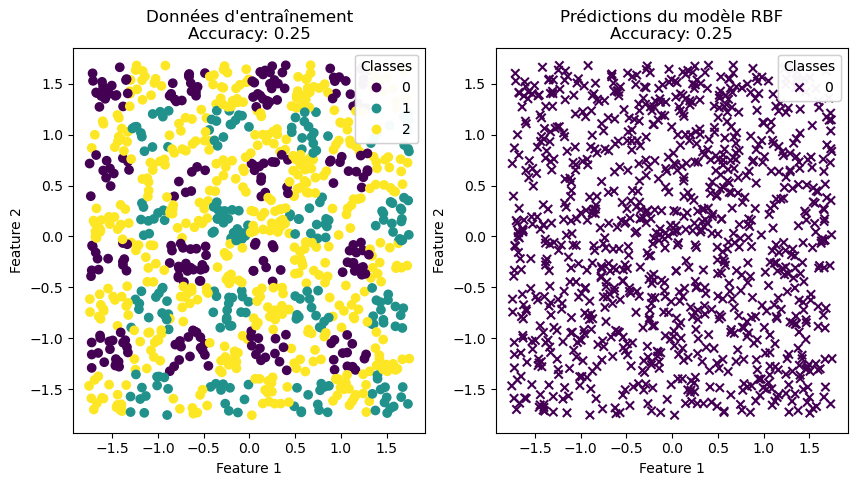

In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

# Générer des données d'entraînement
X_train = np.random.random((1000, 2)) * 2.0 - 1.0
y_train = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
    [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
    [0.0, 0.0, 1.0] 
    for p in X_train
])

def rbf_train_and_predict_multiclass(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions pour un problème multi-classes."""
    predictions = []
    y_train_one_hot = y_train

    for class_idx in range(y_train_one_hot.shape[1]):
        y_train_class = y_train_one_hot[:, class_idx]

        x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
            *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
        )
        y_train_ptr = y_train_class.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

        model_ptr = ctypes.POINTER(RBFModel)()
        weights_ptr = ctypes.POINTER(ctypes.c_double)()
        lib.train_rbf_model_ffi(
            x_train_ptrs,
            y_train_ptr,
            len(x_train),
            x_train.shape[1],
            k,  # nombre de centres
            max_iter, # nombre d'itérations max
            gamma, # gamma
            ctypes.byref(model_ptr),
            ctypes.byref(weights_ptr)
        )
        assert model_ptr is not None
        assert weights_ptr is not None

        x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
            *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
        )

        pred_ptr = ctypes.POINTER(ctypes.c_double)()
        lib.rbf_classification_ffi(
            x_test_ptrs,
            len(x_test),
            x_test.shape[1],
            model_ptr,
            gamma,  # gamma
            weights_ptr,
            ctypes.byref(pred_ptr)
        )
        assert pred_ptr is not None

        class_predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))
        predictions.append(class_predictions)

        lib.free_predictions(pred_ptr)
        lib.free_rbf_model(model_ptr)
        ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    predictions = np.array(predictions).T
    predicted_classes = np.argmax(predictions, axis=1)
    return predictions, predicted_classes

# Paramètres du modèle RBF
k = 4  # nombre de centres
gamma = 1.0  # paramètre gamma
max_iter = 1000  # nombre d'itérations max

# Normaliser les données (optionnel, selon votre implémentation de RBF)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = X_train  # Pour cette démo, nous utilisons les mêmes données pour le test

# Entraîner le modèle RBF et effectuer des prédictions
predictions, predicted_classes = rbf_train_and_predict_multiclass(X_train, y_train, X_test, k, gamma, max_iter)

# Calculer et afficher l'accuracy
accuracy = accuracy_score(np.argmax(y_train, axis=1), predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Visualiser les résultats
plt.figure(figsize=(10, 5))

# Afficher les points d'entraînement avec leurs étiquettes réelles
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(y_train, axis=1), cmap='viridis', marker='o', label='Training data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Données d\'entraînement\nAccuracy: {accuracy:.2f}')
legend1 = plt.legend(*scatter_train.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Afficher les points de test avec leurs étiquettes prédites
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='viridis', marker='x', label='RBF predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Prédictions du modèle RBF\nAccuracy: {accuracy:.2f}')
legend2 = plt.legend(*scatter_test.legend_elements(), title="Classes")
plt.gca().add_artist(legend2)

plt.show()


Prédictions : [1. 1. 1.]
Classes réelles : [8. 2. 6.]


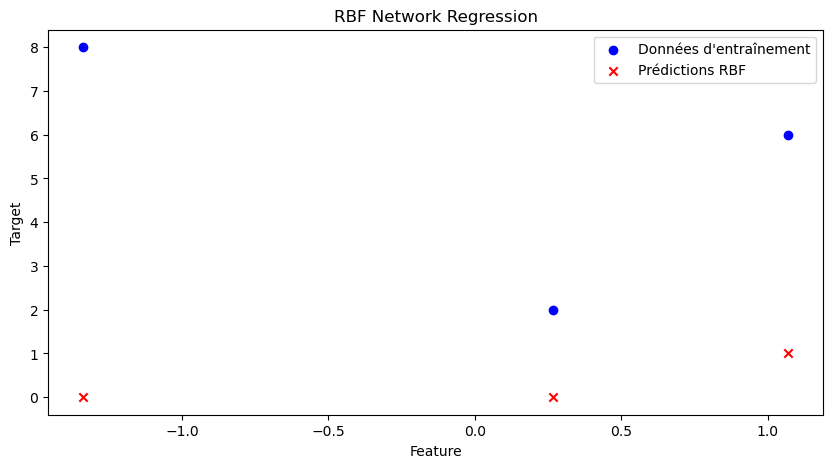

In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_classification_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

def rbf_train_and_predict(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions."""
    x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
    )
    y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

    model_ptr = ctypes.POINTER(RBFModel)()
    weights_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.train_rbf_model_ffi(
        x_train_ptrs,
        y_train_ptr,
        len(x_train),
        x_train.shape[1],
        k,  # nombre de centres
        max_iter, # nombre d'itérations max
        gamma, # gamma
        ctypes.byref(model_ptr),
        ctypes.byref(weights_ptr)
    )
    assert model_ptr is not None
    assert weights_ptr is not None

    x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
    )

    pred_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.rbf_classification_ffi(
        x_test_ptrs,
        len(x_test),
        x_test.shape[1],
        model_ptr,
        gamma,  # gamma
        weights_ptr,
        ctypes.byref(pred_ptr)
    )
    assert pred_ptr is not None

    predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))

    lib.free_predictions(pred_ptr)
    lib.free_rbf_model(model_ptr)
    ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    return predictions

# Données d'entraînement
X_train = np.array([
    [3.0],
    [7.0],
    [9.0]
], dtype=np.float64)

y_train = np.array([
    [8.0],
    [2.0],
    [6.0]
], dtype=np.float64)

# Normaliser les données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Paramètres du modèle RBF
k = 3  # nombre de centres
gamma = 0.1  # paramètre gamma
max_iter = 1000  # nombre d'itérations max

# Entraîner le modèle RBF et effectuer des prédictions
predictions = rbf_train_and_predict(X_train_normalized, y_train, X_train_normalized, k, gamma, max_iter)

# Afficher les résultats
print(f'Prédictions : {predictions}')
print(f'Classes réelles : {y_train.ravel()}')

# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.scatter(X_train_normalized, y_train, color='blue', label='Données d\'entraînement')
plt.scatter(X_train_normalized, predictions, color='red', marker='x', label='Prédictions RBF')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('RBF Network Regression')
plt.legend()
plt.show()
